<a href="https://colab.research.google.com/github/Colsai/DATA-601-Wan/blob/main/DATA601_WK7_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA601 (WAN)
## WK7HWK2
- Simulate a fair die and a biased 6-sided die. The biased die has probabilities {0.15, 0.15, 0.15, 0.15, 0.15, 0.25}. 
- Create a visualization that compares outcomes of multiple rolls of a fair die and this biased die. 
- You can use a single visualization or multiple visualizations to demonstrate the difference in outcomes for the dice. The user of your notebook should be able to alter the number of simulations as an argument to a function.​
- Submit the .ipynb file containing the analysis and the generated pictures.​
- Include the assignment description in a markdown cell at the top of your notebook.

In [ ]:
#Import Packages
import random
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dir(random)[0:5]

['BPF', 'LOG4', 'NV_MAGICCONST', 'RECIP_BPF', 'Random']

In [ ]:
#What functions can we call for random
for element in dir(random):
    rand_items = re.match("rand", element)
    
    if rand_items:
        print(element)

randint
random
randrange


In [ ]:
dir(random.random)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__text_signature__']

I'll use random.choices for weighting the di
https://www.w3schools.com/python/ref_random_choices.asp

Short functions for 
- regular di (even chance between 1-6)
- weighted di


In [ ]:
def regular_di(sides, rolls):
    nm_rolls = []    
    
    for i in range(0,rolls):
        nm_rolls.append(random.randint(1,sides))
    
    return nm_rolls

In [ ]:
def weighted_di(rolls):
    wt_rolls = []    
    
    for i in range(0,rolls):
        roll = random.choices([1,2,3,4,5,6], [.15,.15,.15,.15,.15,.25])
    
    #Random.choices returns as list, select only first elem
        wt_rolls.append(roll[0])
    
    return wt_rolls

In [ ]:
#Create Empty Dataframe
df = pd.DataFrame()

In [ ]:
#let's convert this into a series (https://note.nkmk.me/en/python-pandas-list/)
num_rolls = 1000000

df['regular'] = pd.Series(regular_di(6,num_rolls))
df['weighted'] = pd.Series(weighted_di(num_rolls))
df.weighted.value_counts()

6    250236
2    150866
5    149936
4    149780
3    149669
1    149513
Name: weighted, dtype: int64

Text(0, 0.5, 'Number of Occurences')

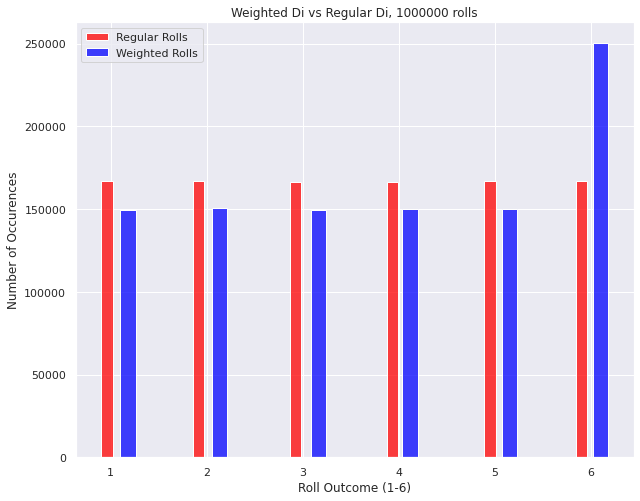

In [ ]:
#Graph the two
fig, ax = plt.subplots(figsize = (10,8), sharex = True, sharey= True)
sns.set_style()

sns.histplot(df.regular +.4, shrink = 2, color = "red", label = "Regular Rolls")
sns.histplot(df.weighted+.6, shrink = 2, color = "blue", label = "Weighted Rolls")

ax.legend()
plt.title(f"Weighted Di vs Regular Di, {num_rolls} rolls")
plt.xlabel("Roll Outcome (1-6)")
plt.ylabel("Number of Occurences")